## 0. Standard Library Imports
For all machine learning projects, you'll often see these libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

>### 0. An end-to-end Scikit-Learn Workflow

In [3]:
# 1. Get the data ready
heart_disease = pd.read_csv("013 heart-disease.csv")

heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (Features Matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (labels)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
# Here we have a classification problem, to classify whether a person has heart disease or not. We will use the random forest algorithm
from sklearn.ensemble import RandomForestClassifier

#instantiate the class
clf = RandomForestClassifier()

# We'll Keep the default hyperparameters
clf.get_params() # See the current parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train) #Telling it to find the patterns in the training data

RandomForestClassifier()

In [8]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

### 4. Evaluate the model on training and test data
# Training data
clf.score(X_train, y_train)

In [9]:
# Testing data
clf.score(X_test, y_test)

0.819672131147541

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.78      0.91      0.84        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[21,  8],
       [ 3, 29]])

In [12]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [13]:
# 5. Improve the model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train) #Telling it to find the patterns in the training data
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")

Trying model with 10 estimators
Model accuracy on test set: 80.33%
Trying model with 20 estimators
Model accuracy on test set: 80.33%
Trying model with 30 estimators
Model accuracy on test set: 80.33%
Trying model with 40 estimators
Model accuracy on test set: 80.33%
Trying model with 50 estimators
Model accuracy on test set: 77.05%
Trying model with 60 estimators
Model accuracy on test set: 81.97%
Trying model with 70 estimators
Model accuracy on test set: 80.33%
Trying model with 80 estimators
Model accuracy on test set: 81.97%
Trying model with 90 estimators
Model accuracy on test set: 80.33%


In [14]:
# 6. Save a model and load it
import pickle
 
pickle.dump(clf, open("random_forest_model_v1.pkl", "wb")) # wb - write binary

In [15]:
#load the model
loaded_model = pickle.load(open("random_forest_model_v1.pkl", "rb")) #rb - read binary
loaded_model.score(X_test, y_test)

0.8032786885245902

### 1. Getting data ready to be used with ML
 > Things to do:
 
>>     1. Split the data into features and labels, X and Y
    
>>     2. Filling (imputing) or disregarding missing values
    
>>     3. converting non - numerical values to numeric (feature encoding)

In [16]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
#split data to training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

#### 1.1 Make sure it is all numerical

In [20]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.value_counts()

Make    Colour  Odometer (KM)  Doors  Price
BMW     Black   11049          3      19500    1
Toyota  Blue    76416          4      21653    1
                42459          4      6386     1
                42480          4      19720    1
                44815          4      8460     1
                                              ..
Honda   White   113066         4      10076    1
                113250         4      9675     1
                113704         4      23280    1
                115183         4      6481     1
Toyota  White   248815         4      9785     1
Name: count, Length: 1000, dtype: int64

In [21]:
# Split the data
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
#Build Machine Learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [23]:
## Turning categories in numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")
transfromed_X = transformer.fit_transform(X)
transfromed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [24]:
pd.DataFrame(transfromed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
##or you can use pd.get_dummies
##fit the model
X_train, X_test, y_train, y_test = train_test_split(transfromed_X, y, test_size=0.2)

model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

### 1.2 Handling missing values

1. Fill them with some value (Imputing)
2. Remove the samples with missing data

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

#### Option 1: Fill missing data with Pandas

In [ ]:
#Fill the "Make" column
car_sales_missing["Make"].fillna("Missing")

# Colour
car_sales_missing["Colour"].fillna("Missing")

#odometer
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# fill the Doors
car_sales_missing["Doors"].fillna(4)

car_sales_missing.isna().sum()

In [ ]:
## Remove the rows that do not have price
car_sales_missing.dropna(inplace=True)

car_sales_missing.isna().sum()

In [192]:
len(car_sales_missing)

950

In [193]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

#Convert data to numbers
## Turning categories in numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")
transfromed_X = transformer.fit_transform(car_sales_missing)
transfromed_X
pd.DataFrame(transfromed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill missing values with Scikit Learn

In [194]:
car_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [195]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [196]:
car_missing.dropna(subset=["Price"], inplace=True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [197]:
#Split into x and y
X = car_missing.drop('Price', axis=1)
y = car_missing["Price"]
len(y), len(X)

(950, 950)

In [198]:
#Handling missing values with scikit learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value='Missing')
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# create  an imputer (Something that fill misssing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", numerical_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(car_missing)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [199]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,Missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [200]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [201]:
## Turning categories in numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")
transfromed_X = transformer.fit_transform(car_sales_filled)
transfromed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [202]:
# Lets Fill a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transfromed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2221112515179916

## 2. Choosing the right estimator/algorithm/model for our problem

* Classification - predicting wheter a sample is one thing or another

* Regression - predictiong a number

### 2.1 Pick an estimator for a regression problem

In [203]:
# Import Boston Housing dataset
from sklearn.datasets import _california_housing

california_train = pd.read_csv("california_housing_train.csv")
california_test = pd.read_csv("california_housing_test.csv")

In [204]:
#How many samples
len(california)

17000

In [205]:
# Trying the ridge regression model

from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#create the data
X = california.drop("median_house_value", axis=1)
y = california["median_house_value"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set the model
model = Ridge()
model.fit(X_train, y_train)

#Check the score on test data
model.score(X_test, y_test)


0.6636401278014059

### ensemble method

In [206]:
california_train = pd.read_csv("california_housing_train.csv")
california_test = pd.read_csv("california_housing_test.csv")

In [207]:
from sklearn.ensemble import RandomForestRegressor


#Setup random seed
np.random.seed(42)

#create the data
X = california.drop("median_house_value", axis=1)
y = california["median_house_value"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#Check the score on test data
rf.score(X_test, y_test)

0.8220116053669067

### 2.2 Choosing an estimator for a classification problem

In [208]:
heart_disease = pd.read_csv("013 heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [209]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [210]:
len(heart_disease)

303

The map suggests we try linearsvc

In [211]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate the model
model = LinearSVC(max_iter=2000000)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

LinearSVC not working

In [212]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate model
cfr = RandomForestClassifier()
cfr.fit(X_train, y_train)

cfr.score(X_test, y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data use ensemble methods (csv)
    2. If you have unstructured data use deep learning or transfer learning (Images, audio)

### 3. Fitting Model to your data and use it to make predictions
> 3.1. Fitting the model

In [242]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate model
cfr = RandomForestClassifier()

#fit the model
cfr.fit(X_train, y_train)

cfr.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using the model

2 ways to make predictions:
1. `predict()`
2. `predict_proba())`

In [243]:
# Use a trained model to make prediction
cfr.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [244]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [245]:
# compare predictions to truth labels to evaluate the model
y_preds = cfr.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [246]:
#or 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions using `predict_proba()`

In [247]:
#predict proba, returns probabilities of a classification label
cfr.predict_proba(X_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

`Predict can also be used for regression models`

In [232]:
from sklearn.ensemble import RandomForestRegressor


#Setup random seed
np.random.seed(42)

#create the data
X = california.drop("median_house_value", axis=1)
y = california["median_house_value"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#Check the score on test data
rf.score(X_test, y_test)

0.8220116053669067

In [233]:
y_preds = rf.predict(X_test)
y_preds[:10]

array([147950.  , 464823.43,  83489.  , 144284.  , 101982.  , 270988.01,
       165249.  , 164315.  , 369127.06, 228529.01])

In [234]:
np.array(y_test[:10])

array([142700., 500001.,  61800., 162800.,  90600., 232100., 147800.,
       133300., 438500., 187700.])

In [235]:
## compare predictions to true
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

32380.845147058822

## 4. Evaluating a model
> 1. Estimator Score Method
> 2. Scoring Parameter
> 3. Metric Functions
>
 #### 4.1 Using `score()` method

In [249]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)

model.score(X_test, y_test)

0.8524590163934426

In [250]:
# For regression
from sklearn.ensemble import RandomForestRegressor


#Setup random seed
np.random.seed(42)

#create the data
X = california.drop("median_house_value", axis=1)
y = california["median_house_value"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#Check the score on test data
rf.score(X_test, y_test)

0.8220116053669067

### 4.2 Evaluating a model using the `scoring` parameter

In [251]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)



In [252]:
model.score(X_test, y_test)

0.8524590163934426

In [253]:
cross_val_score(model, X, y) #K-fold cross validation where K = 5

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [254]:

#single test_score
single_test_score = model.score(X_test, y_test)

#5 fold cross validation mean
cros_val_score = np.mean(cross_val_score(model, X, y))

single_test_score, cros_val_score


(0.8524590163934426, 0.8183606557377049)

In [ ]:
# Default scring parameter of classifier is mean accuracy
mode.score()

In [255]:
#scring parameter set to none by default
cross_val_score(model, X, y, scoring=None)

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification report

Accuracy

In [257]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestClassifier()

cross_val_score = cross_val_score(model, X, y) #Default = mean accuracy
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [258]:
print(f"Heart Disease Classifier Cross Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross Validated Accuracy: 82.48%


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Area under the ROC Curve **Area under the Receiver Operating Characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC Curve

ROC Curves are a comparison of a model's true positive rate (tpr)  versus a model's false positive rate (fpr)

* True positive = Model predicts 1 and the truth is 1
* False positice = model predicts 1 when truth is 0
* True negative = Model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [262]:
from sklearn.metrics import roc_curve
# fit the classifier 
model.fit(X_train, y_train)
# make predictions with probabilities
y_proba = model.predict_proba(X_test)
y_proba[:10]

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61]])

In [264]:
y_probe_positive = y_proba[:, 1]
y_probe_positive

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61, 0.84,
       0.77, 0.97, 0.5 , 0.85, 0.08, 0.77, 0.49, 0.05, 0.05, 0.94, 0.85,
       1.  , 0.76, 0.15, 0.28, 0.86, 0.12, 0.68, 0.41, 0.19, 0.14, 0.22,
       0.49, 0.91, 0.96, 0.78, 0.88, 0.2 , 0.97, 0.35, 0.78, 0.88, 0.24,
       0.02, 0.43, 0.03, 0.9 , 0.75, 0.36, 0.42, 0.2 , 0.9 , 0.31, 0.47,
       0.97, 0.67, 0.06, 0.94, 0.06, 0.07])

In [266]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probe_positive)

# chek the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

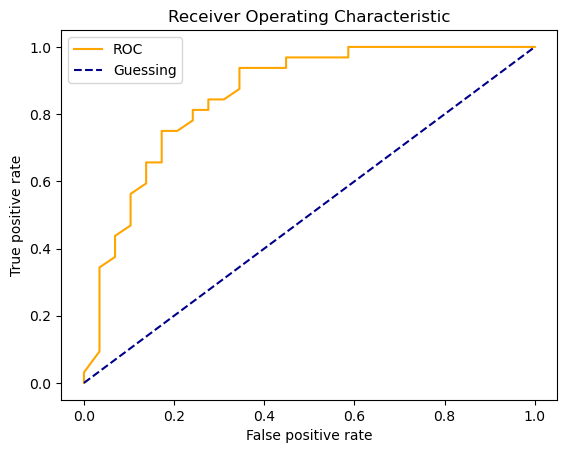

In [269]:
#plot a ROC Curve
#create a function for plotting ROC curves
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC Curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    #Plot Roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [270]:
# AUC Score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probe_positive)

0.8561422413793104

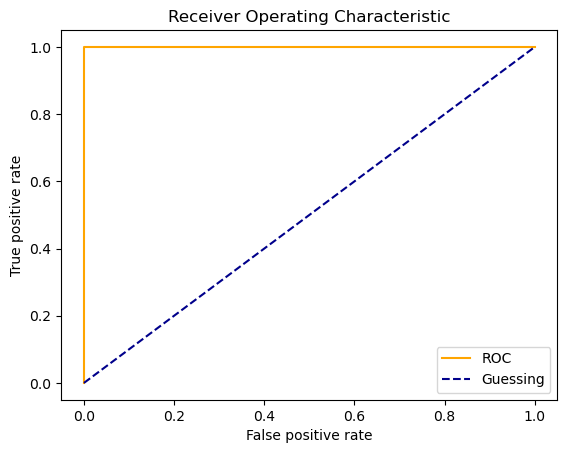

In [271]:
# Plot perfect ROC Curve and AuC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [272]:
# Perfect auc score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion Matrix is a quick way to compare the labels a model predicts and the actual labels it was suppossed to predict

In essence, giving you an idea of where the model is getting confused 

In [273]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]])

In [274]:
# visualize confusion matrix with pd.crosstab
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual Label,,
0,24,5
1,8,24


In [ ]:
import sys
!conda install --yes --prefix (sys.prefix) seaborn

In [275]:
# Make confusion matrix more visual with seaborn heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat)

ModuleNotFoundError: No module named 'seaborn'

In [277]:
def plot_conf_mat(conf_mat):
    """
    Plot the confusion matrix using seaborn heatmap
    """
    fig, ax = subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                    annot=True, #Annotate the boxes with conf_mat info
                    char=False
                    )
    plt.xlabel("True Label")
    plt.yLabel("Predicted Label")
    #fix broken annotations

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top=0.5);

plot_conf_mat(conf_mat)

NameError: name 'conf_mat' is not defined

In [278]:
# Plot confusion matrix with sklearn
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X, y)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/metrics/__init__.py)

**Classification Report**

  Collection of differen evaluation metrics

In [280]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [284]:
# Where precision and recall are valuable
disease_true = np.zeros(1000)
disease_true[0] = 1 # Onlt on epositive case

disease_preds = np.zeros(1000) #3 model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


To summarize classification metrics:

* Accuracy is a good measure to start with if all classes are balanced (eg. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced
* If false positive predictions are worse then false negatives, aim for higher precision
* If false negative predictions are worse than false positive, aim for higher recall
* F1-score is a combinationof precisiona and recall

### 4.2.2 Regression model evaluation metrics

1. R^2 or coeffiient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

*R^2*

Compares your models predictions to the mean of the targets. Values can range from negative infinity (very poor model) to 1. Eg, if all your model does is predict the mean of the targets, it's  R^2 value would be 0. And if your model perfectly predicts a range of numbers its R^2 value would be 1

In [286]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = california.drop("median_house_value", axis=1)
y = california["median_house_value"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train);

In [287]:
rf.score(X_test, y_test)

0.8220116053669067

In [288]:
from sklearn.metrics import r2_score

#Fill an array with y_test_mean
y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean

array([209673.13735294, 209673.13735294, 209673.13735294, ...,
       209673.13735294, 209673.13735294, 209673.13735294])

In [290]:
r2_score(y_test, y_test_mean)

0.0

In [291]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error**

Is the average of the absolute differences btn predictions and actual values. it gives you an idea of how wrong your model's predictions are

In [292]:
from sklearn.metrics import mean_absolute_error

y_preds = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)

mae

32380.845147058822

In [295]:
df = pd.DataFrame(data={"actual_values": y_test,
                       "predicted_values": y_preds})
df["difference"] = df["predicted_values"] - df["actual_values"]
df

,actual_values,predicted_values,difference
10941,142700.0,147950.00,5250.00
5250,500001.0,464823.43,-35177.57
10292,61800.0,83489.00,21689.00
2266,162800.0,144284.00,-18516.00
6398,90600.0,101982.00,11382.00
...,...,...,...
4706,211400.0,208398.01,-3001.99
8404,500001.0,479257.55,-20743.45
11114,162500.0,94251.00,-68249.00
7877,360700.0,348383.04,-12316.96


**Mean Squared Error (MSE)**

In [297]:
from sklearn.metrics import mean_squared_error
y_preds = rf.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

2452475069.2795153

In [300]:
# calculate MSE by hand
df["squared"] = np.square(df["difference"])
df

,actual_values,predicted_values,difference,squared
10941,142700.0,147950.00,5250.00,2.756250e+07
5250,500001.0,464823.43,-35177.57,1.237461e+09
10292,61800.0,83489.00,21689.00,4.704127e+08
2266,162800.0,144284.00,-18516.00,3.428423e+08
6398,90600.0,101982.00,11382.00,1.295499e+08
...,...,...,...,...
4706,211400.0,208398.01,-3001.99,9.011944e+06
8404,500001.0,479257.55,-20743.45,4.302907e+08
11114,162500.0,94251.00,-68249.00,4.657926e+09
7877,360700.0,348383.04,-12316.96,1.517075e+08


In [301]:
df["squared"].mean()

2452475069.2795153

### 4.2.3 Using the `scoring` parameter

In [302]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [304]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [306]:
# Cross-validated accuracy
print(f"The cross validated accuracy: {np.mean(cv_acc) * 100:.2f}%")

The cross validated accuracy: 82.48%


In [308]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f"The cross validated accuracy: {np.mean(cv_acc) * 100:.2f}%")

The cross validated accuracy: 82.48%


In [309]:
#Precision
cv_precision = cross_val_score(clf, X, y, scoring="accuracy")

In [310]:
np.mean(cv_precision)

0.8018032786885245

In [312]:
#Recall
cv_recall = cross_val_score(clf, X, y, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [313]:
#F1 score
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
np.mean(cv_f1)

0.841476533416832

For regression model

In [315]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = california.drop("median_house_value", axis=1)
y = california["median_house_value"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set the model
rf = RandomForestRegressor()
# rf.fit(X_train, y_train);

In [317]:
np.random.seed(42)

cv_r2 = cross_val_score(rf, X, y, scoring=None)
cv_r2

array([-0.29945238,  0.56969504,  0.60183225,  0.50240532,  0.5398472 ])

In [318]:
np.random.seed(42)

cv_r2 = cross_val_score(rf, X, y, scoring="r2")
cv_r2

array([-0.29945238,  0.56969504,  0.60183225,  0.50240532,  0.5398472 ])

In [319]:
#MAE

cv_mae = cross_val_score(rf, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-96949.86517941, -44540.81060882, -62618.70904118, -48068.64373529,
       -63212.36544706])

In [321]:
# MSE

cv_mse = cross_val_score(rf, X, y, scoring="neg_mean_squared_error")
cv_mse

array([-1.40374462e+10, -3.52776213e+09, -7.82764492e+09, -3.93468872e+09,
       -7.24636418e+09])

### 4.3 Using different evaluation metrics as scikit learn functions

**Clasification evaluation functions**

In [323]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)
y_preds = model.predict(X_test)

#Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


**Regression evaluation functions**

In [326]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
#create the data
X = california.drop("median_house_value", axis=1)
y = california["median_house_value"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train);

#predict
preds = rf.predict(X_test)

#evaluate
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, preds)}")
print(f"MAE: {mean_absolute_error(y_test, preds)}")
print(f"MSE: {mean_absolute_error(y_test, preds)}")

Regression model metrics on the test set
R^2: 0.8220116053669067
MAE: 32380.845147058822
MSE: 32380.845147058822


## 5. Improving a model

First prediction = baseline predictions

First model = baseline model

From a data perspective:
* Could we collect more data (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a beter model we could use?
* Could we improve the current model? (Can we improve hyperparameter)

Parameters = model finds patter in data

hyperparameters = settings on a model you can adjust to potentially improve its ability to find patterns

Three ways to adjust hyperparameters:
* By hand
* Randomly with RandomSeachCV
* Exhaustively with GridSearchCV

In [328]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [329]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

This introduces a validation set. This is where the hyperparameters are tuned

Make three sets Training, validation, test
We will try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `Estimators`


In [344]:
# Evaluation function
def evaluate_preds(y_true, y_preds):
    """Perfoms an evaluation comparison on y_true labels vs y_pred lables on classification model"""
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dict    

In [347]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X, y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]

X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [349]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# first predict on the validation data
y_preds = clf.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid, y_preds)

baseline_metrics

Acc: 84.44%
Precision: 0.85
Recall: 0.88
F1: 0.86


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

In [353]:
np.random.seed(42)

#create a second classifier with different hyperpaameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)
#make predictions
y_preds = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds)

clf_2_metrics

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [361]:
np.random.seed(42)

#create a second classifier with different hyperpaameters
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=50)
clf_3.fit(X_train, y_train)
#make predictions
y_preds = clf_3.predict(X_valid)
clf_3_metrics = evaluate_preds(y_valid, y_preds)

clf_3_metrics

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Hyperparameter tuning with RandomizedSearchCv

In [370]:
# Randomized search CV (Cross validation)
from sklearn.model_selection import RandomizedSearchCV

#create a grid of hyperparameters
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split into x and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate randomForestCalls
clf = RandomForestClassifier(n_jobs=1) #n-jobs - how much of your computer processing are you going to dedicate

#set up randomizedsearchcv
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# fit the randomized Search cv version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=  12.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=  14.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=  11.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=  12.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=  10.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  F

In [366]:
#which of those got the best parameters
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [367]:
#when you call predict on rs_clf the above params will be used by default
rs_y_preds = rs_clf.predict(X_test)

#evaluate
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

### 5.3 Hyperparameter Tuning with grid Search cv

In [368]:
# Difference btn gridsearch cv and randomizedserchcv is that grid search is like a brute force search, i.e will go through every single combination that is avilable
# we want to reduce the search space of hyperparameters

grid_2 = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2]
}

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into x and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate randomForestCalls
clf = RandomForestClassifier(n_jobs=1) #n-jobs - how much of your computer processing are you going to dedicate

#set up gridsearchcv
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

# fit the randomized Search cv version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/maverick/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  F

In [369]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [375]:
gs_pred = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_pred)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


Let's compare our different model metrics

<Axes: >

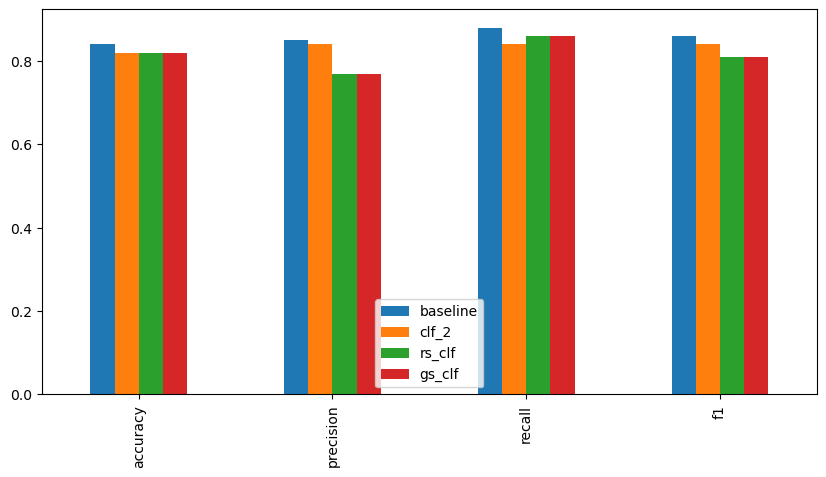

In [380]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "rs_clf": rs_metrics,
                                "gs_clf": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 5))

## 6. Saving and loading trained ml models

Two ways
1. with pickle module
2. with joblib module

**With Pickle**

In [381]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [382]:
# load a saved model
loaded_model = pickle.load(open("gs_random_forest_model_1.pkl", 'rb'))

In [384]:
#make prediction
more_pred = loaded_model.predict(X_test)
evaluate_preds(y_test, more_pred)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**With Joblib**

In [385]:
from joblib import dump, load

dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [386]:
loaded_job = load(filename="gs_random_forest_model_1.joblib")

In [387]:
#make prediction
more_pred = loaded_job.predict(X_test)
evaluate_preds(y_test, more_pred)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together

In [390]:
#using pipeline class. Pipeline is a way to string together a number of scikit learn processes on one hit
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [391]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do

1. fill missing data
2. Conert data to numbers
3. Build a model on the data

In [394]:
# Getting Data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Set up random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numerical_values = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('door', door_transformer, door_feature),
        ('num', numerical_transformer, numerical_values)
    ]
)

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and Score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It is possible to Use GridSeachCV or RandomizedSearchCV with a pipeline

In [398]:
# Use GridSearchCV with our regression Pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": [10],
    "model__min_samples_split": [2, 4]
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [10],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [399]:
gs_model.score(X_test, y_test)

0.3306507400481623